In [79]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
from matplotlib.pyplot import subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import \
 (RandomForestClassifier as RF)
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP.models import ModelSpec as MS
from matplotlib.pyplot import subplots
from ISLP import confusion_table
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
#import kagglehub
!pip install kaggle

In [5]:
# NOAA Atlantic Hurricane Database dataset
!kaggle datasets download -d utkarshx27/noaa-atlantic-hurricane-database

# Unzip the downloaded dataset
import zipfile

with zipfile.ZipFile('noaa-atlantic-hurricane-database.zip', 'r') as zip_ref:
    zip_ref.extractall('noaa_dataset')

print("Dataset has been downloaded and extracted to 'noaa_dataset' directory.")

Dataset URL: https://www.kaggle.com/datasets/utkarshx27/noaa-atlantic-hurricane-database
License(s): CC0-1.0
noaa-atlantic-hurricane-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset has been downloaded and extracted to 'noaa_dataset' directory.


In [45]:
import pandas as pd

df = pd.read_csv('noaa_dataset/storms.csv')
df.head()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [47]:
dp = pd.DataFrame(df)

In [49]:
dp['category'] = dp['category'].fillna(0)
dp['tropicalstorm_force_diameter'] = dp['tropicalstorm_force_diameter'].fillna(-1)
dp['hurricane_force_diameter'] = dp['hurricane_force_diameter'].fillna(-1)

In [51]:
status_mapping = {
    'tropical depression': 1,
    'tropical storm': 2,
    'hurricane': 3,
    'extratropical': 4,
    'other low': 5,
    'subtropical storm': 6,
    'subtropical depression': 7,
    'disturbance': 8,
    'tropical wave': 9
}

# Apply mapping to the 'status' column
dp['status_numeric'] = dp['status'].map(status_mapping)

In [53]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      19066 non-null  float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  19066 non-null  float64
 13  h

In [59]:
features = ['year','month','day','hour','pressure', 'lat', 'long','tropicalstorm_force_diameter', 'hurricane_force_diameter','wind']
target = dp['status_numeric']

In [61]:
# 80% train, 20% test
y = dp['status_numeric']
X = dp.drop(columns = 'status_numeric')
X = X[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9360251704247509
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       697
           2       0.94      0.98      0.96      1318
           3       1.00      1.00      1.00       918
           4       0.90      0.84      0.87       438
           5       0.87      0.83      0.85       300
           6       0.89      0.62      0.73        55
           7       0.95      0.50      0.65        36
           8       1.00      0.44      0.61        32
           9       0.92      0.60      0.73        20

    accuracy                           0.94      3814
   macro avg       0.93      0.75      0.81      3814
weighted avg       0.94      0.94      0.93      3814



Text(50.722222222222214, 0.5, 'True Label')

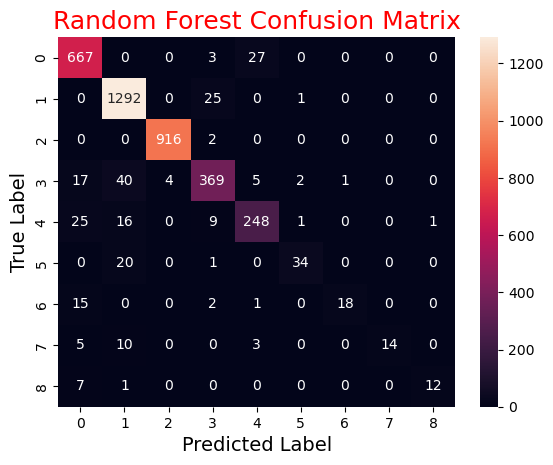

In [63]:
# Train the Random Forest Classifier
rf_classifier = RF(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.title("Random Forest Confusion Matrix",fontsize=18, color="red");
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

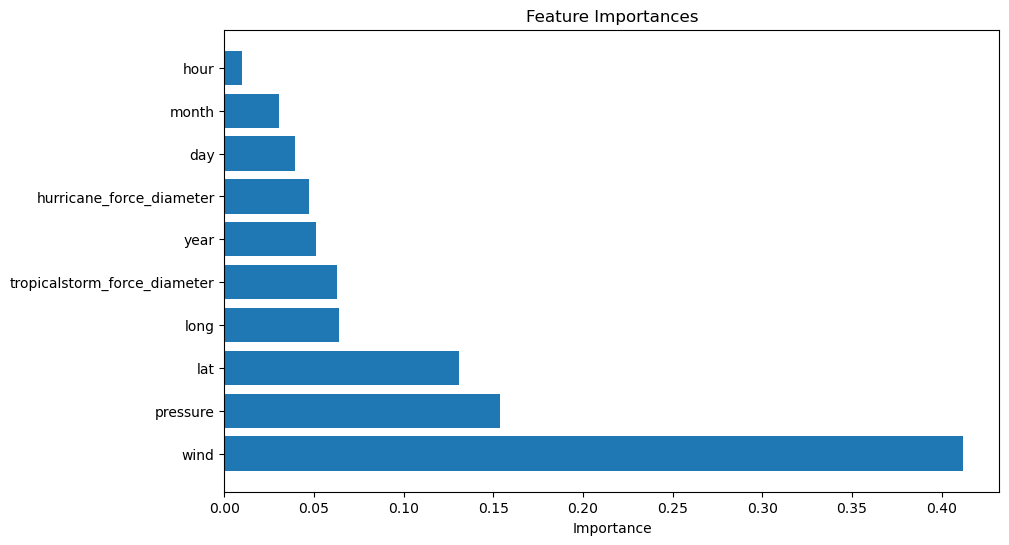

In [65]:
# Understanding feature importance
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

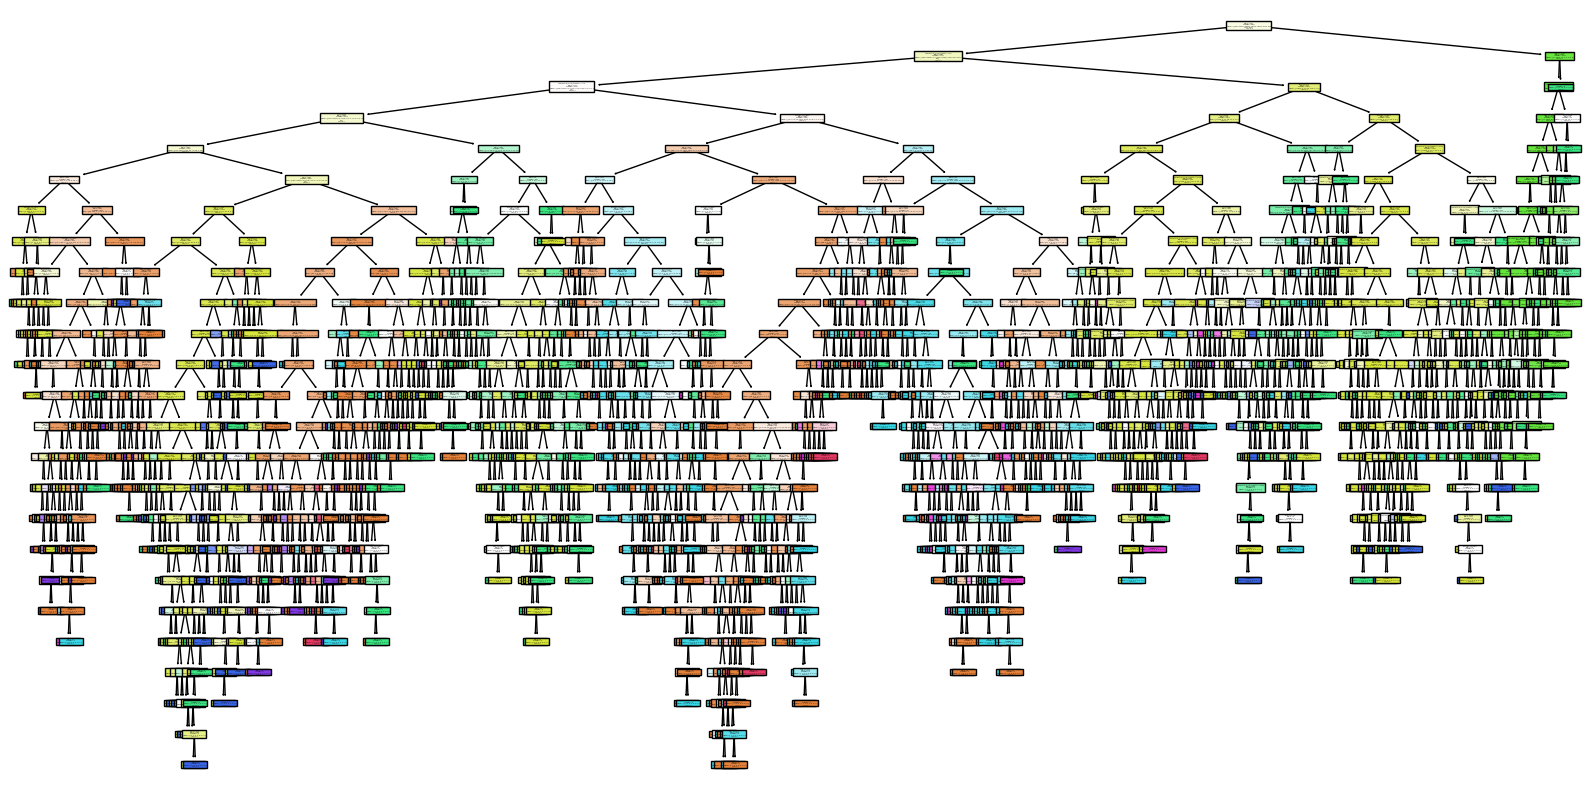

In [85]:
# Plot the first tree

# Convert class names to strings if they are integers
class_names = [str(cls) for cls in rf_classifier.classes_]

# Plot the first tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], 
          filled=True, 
          feature_names=X.columns, 
          class_names=class_names)
plt.show()